        性別   年齡  BMI   拳擊   器材   有氧   舞蹈  高強度間歇   瑜伽  肌力訓練   燃脂  減脂瘦身  增加肌肉  \
5      1.0  4.7  2.0  0.0  0.0  1.0  1.0    1.0  1.0   0.0  1.0   1.0   1.0   
10     1.0  4.6  2.0  1.0  1.0  1.0  0.0    1.0  0.0   1.0  1.0   0.0   1.0   
12     1.0  4.3  2.0  0.0  1.0  1.0  1.0    1.0  0.0   0.0  0.0   1.0   1.0   
33     1.0  3.8  1.0  0.0  1.0  1.0  1.0    0.0  0.0   1.0  0.0   1.0   0.0   
43     1.0  4.5  2.0  1.0  1.0  1.0  1.0    1.0  1.0   1.0  1.0   0.0   1.0   
...    ...  ...  ...  ...  ...  ...  ...    ...  ...   ...  ...   ...   ...   
26391  0.0  4.6  2.0  1.0  1.0  1.0  1.0    0.0  1.0   1.0  1.0   1.0   1.0   
26403  1.0  4.6  2.0  0.0  0.0  1.0  0.0    1.0  1.0   1.0  1.0   0.0   1.0   
26411  0.0  4.5  2.0  0.0  1.0  0.0  1.0    1.0  0.0   0.0  1.0   0.0   1.0   
26414  1.0  2.6  1.0  1.0  0.0  0.0  0.0    0.0  0.0   0.0  0.0   0.0   0.0   
26416  0.0  3.0  1.0  0.0  1.0  1.0  0.0    1.0  1.0   0.0  1.0   0.0   0.0   

       增強體魄  舒緩壓力  推薦類型  
5       1.0   1.0     0  

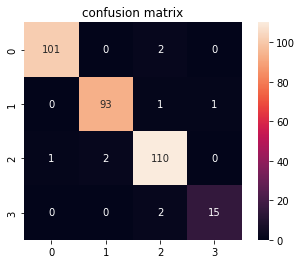

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


newtrain1=[]
traindata=pd.read_csv('train.csv')
testdata=pd.read_csv('test.csv')


for i in range(0,len(traindata),1):
    
    if traindata.loc[i][15]!='肌力' and traindata.loc[i][15]!='柔軟度' and traindata.loc[i][15]!='心肺' and traindata.loc[i][15]!='肌耐力':
        newtrain1.append(i)
    elif traindata.loc[i][2]<10 or traindata.loc[i][2]>30:
        newtrain1.append(i)
    elif traindata.loc[i][1]<20 or traindata.loc[i][1]>55   :
        newtrain1.append(i)
    elif min(traindata.loc[i][3:14])<0 or max(traindata.loc[i][3:14])>1:
        newtrain1.append(i)


traindata['年齡']=traindata['年齡'].values/10
traindata['BMI']=traindata['BMI'].values/10
testdata['年齡']=testdata['年齡'].values/10
testdata['BMI']=testdata['BMI'].values/10
traindata.drop(newtrain1,inplace=True)
traindata.replace({"推薦類型":{'肌力':0,'柔軟度':1,'心肺':2,'肌耐力':3}},inplace=True)
traindata=traindata.dropna(axis=0,how='any')
traindata.round(1)
print(traindata)


X=traindata.drop(columns=['推薦類型'],axis=1)
Y=traindata['推薦類型']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)



# criterion=['gini','entropy','log_loss']
# splitter=['random','best']
# random_state=[0,None,4]


# param_grid1={
#             'criterion':criterion,
#             'splitter':splitter,
#             'random_state':random_state
#             }

# model1=DecisionTreeClassifier()
# grid=GridSearchCV(estimator=model1,param_grid=param_grid1,cv=2,verbose=5,n_jobs=2)
# grid.fit(X_train,Y_train)
# grid.best_params_


# n_estimators=[1000,1500,2500]
# warm_start=[True,False]
# random_state=[0,None,4]


# param_grid2={
#             'n_estimators':n_estimators,
#             'warm_start':warm_start,
#             'random_state':random_state
#             }

# model2=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',splitter='random',random_state=0))
# grid=GridSearchCV(estimator=model2,param_grid=param_grid2,cv=2,verbose=5,n_jobs=2)
# grid.fit(X_train,Y_train)
# grid.best_params_


model=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',splitter='random',random_state=0),n_estimators=2500,\
    warm_start=True,random_state=0)
model.fit(X_train,Y_train)
# model.fit(X,Y)
print(model.score(X_test,Y_test))


y_predict=model.predict(X_test)
mat=confusion_matrix(y_predict,Y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
 xticklabels=[0,1,2,3],
 yticklabels=[0,1,2,3])
plt.title('confusion matrix')


y1_predict=model.predict(testdata)
y_predict_pd=pd.DataFrame(data=y1_predict,columns=['Label'])
y_predict_pd=y_predict_pd.reset_index()
y_predict_pd
y_predict_pd.to_csv('result.csv',index=False)